In [7]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createData
from feedforward import FeedForwardNN, BCELoss

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

(150, 2)
[-0.33676548 -0.5519463 ]


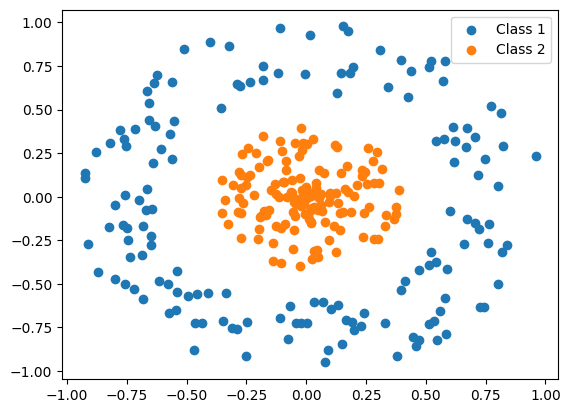

In [8]:
class1, class2 = createData(150, 150)
print(class1.shape)
print(class1[0])
plt.scatter(class1[:,0], class1[:,1], label="Class 1")
plt.scatter(class2[:,0], class2[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [9]:
nn = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [10, 10, 10], activation = "relu", output_activation = "sigmoid")
weights = nn.weights()
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

(10, 2)
[[ 0.13970902 -0.07773941]
 [-0.43569386  0.69924968]
 [ 0.64838499  0.60002498]
 [ 0.70552123  0.31015087]
 [-0.70358503  0.02640315]
 [-0.6333994  -0.30549605]
 [ 0.46892485 -0.32068436]
 [ 0.4990331  -0.62208946]
 [-0.41205066 -0.41264134]
 [-0.58503252 -0.52173059]]
(10, 10)
[[-0.25274602  0.21253087 -0.17280817 -0.13331045  0.07566342 -0.27622665
  -0.26495782  0.24111109 -0.29840494  0.0981177 ]
 [-0.10220871 -0.17962595 -0.27357271 -0.07351599  0.28999074  0.25675607
  -0.1642388   0.29677933  0.04912786 -0.01333026]
 [ 0.0669957  -0.1599396   0.26601869  0.2166801   0.04978478  0.3131262
  -0.08263378  0.08820232 -0.24866832 -0.19850758]
 [-0.03651269  0.00429777 -0.26005024 -0.22281985 -0.11507568 -0.13265466
  -0.2026859  -0.2846542  -0.29650334 -0.11004562]
 [ 0.15518464  0.07974105 -0.21614233  0.01440672  0.20645709 -0.3087009
   0.13877703 -0.00802767 -0.27004491 -0.11697782]
 [ 0.17685349  0.01963354  0.21098697  0.19526763  0.2054407  -0.20277315
  -0.04741854  

### Quick forward call

In [10]:
input = class1[0]
output = nn.forward(input)
print(output)
loss = BCELoss(output[0], 1)
print(loss)

[0.5087952077911712]
0.6757096856500082


### Train network on the two classes

In [11]:
nr_epochs = 100
learning_rate = 0.001
running_loss = 0
loss1 = []
loss2 = []
rloss = []
for epoch in range(nr_epochs):
    for i in range(class1.shape[0]):
        # class1
        output = nn.forward(class1[i])[0]
        current_loss = BCELoss(output, 0)
        loss1.append(current_loss)
        running_loss += current_loss
        nn.backprop(class1[i], output, 0, "BCELoss", learning_rate)
        
        # class2
        output = nn.forward(class2[i])[0]
        current_loss = BCELoss(output, 1)
        loss2.append(current_loss)
        running_loss += current_loss
        nn.backprop(class2[i], output, 1, "BCELoss", learning_rate)

        
    rloss.append(running_loss/(class1.shape[0] * 2))
    running_loss = 0

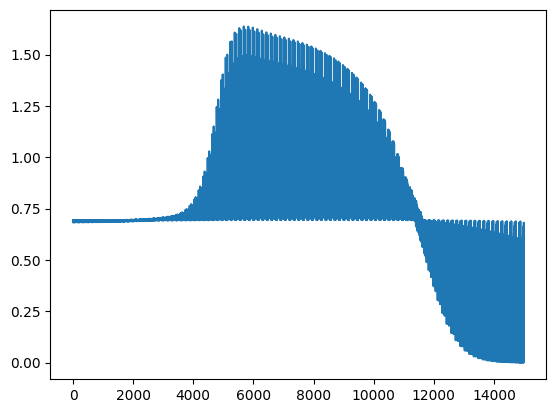

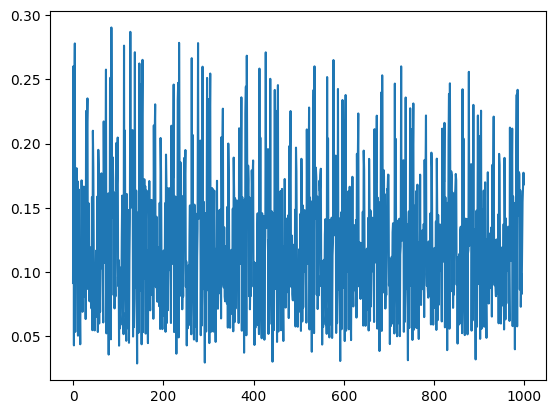

<function matplotlib.pyplot.show(close=None, block=None)>

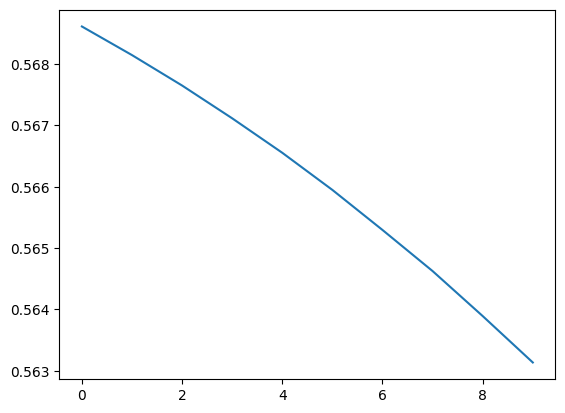

In [14]:
plt.plot(loss2)
plt.show()

plt.plot(loss1)
plt.show()

plt.plot(rloss)
plt.show